# Regresión Lineal con Árbol de decisión

In [ ]:
# Importo librerías
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
# Genero un dataset aleatorio con una variable X y una variable Y
X = np.linspace(-5 , 5, 1000).reshape(1000, 1)
y_limpia = np.sin(3 * X) + X

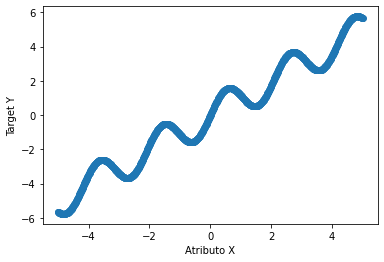

In [ ]:
# Represento los datos
plt.scatter(X, y_limpia)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

In [ ]:
# Añado ruido a la salida Y para tener una función menos "ideal"
y_ruido = np.random.normal(size=len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido

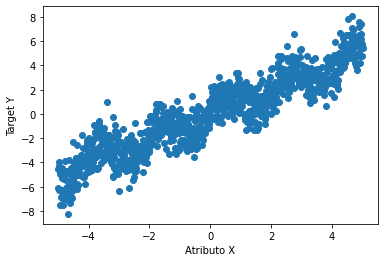

In [ ]:
plt.scatter(X, y)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

In [ ]:
# Divido en dos datasets, train (con el que optimizo los hiperparámetros) y test (con el que 
# pruebo el rendimiento del modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

En la etapa siguiente se realiza la división de datos en Train + Test como se explicó en la unidad I. Los datos de Train, a su vez, se dividen en distintos conjuntos con lo que se conoce como validación cruzada. El método GridSearchCV realiza esa validación cruzada automáticamente. Además, este método se utiliza para optimizar los parámetros aplicando todas sus combinaciones posibles. En este caso, el parámetro a optimizar es max_depth. Se prueban valores entre 3 y 7 y se elige como óptimo el que mejores resultados tenga en los conjuntos de validación por medio de validación cruzada. 

En este caso max_depth tiene 5 valores  que son: 3, 4, 5, 6 y 7. Utilizando GridSearchCV se ajusta un modelo utilizando max_depth=3, se divide (X_train,Y_train) en 3 conjuntos ya que cv=3. Se halla la métrica media de validación en esos tres conjuntos, la cual será la métrica de max_depth=3. Posteriormente se utiliza max_depth=4 y se vuelve a optener la métrica media de validación en esos tres conjuntos. Análogamente para max_depth= 5,6,7. El valor de max_depth que mejor métrica media obtenga es el mejor parámetro.

Posteriormente, el método predict(X) obtiene la predicción utilizando los mejores parámetros calculados con GridSearchCV.


In [ ]:
# Obtengo el mejor parámetro de profundidad del árbol entre 3 y 7 usando 
# validación cruzada y gridsearch
regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=3)


In [ ]:
y_train_pred = regr_opt.predict(X_train)
y_test_pred = regr_opt.predict(X_test)

In [ ]:
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),1)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),4)))

La R^2 en los datos de train es: 0.9
La R^2 en los datos de test es: 0.8765


In [ ]:
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_opt.predict(X_fit)

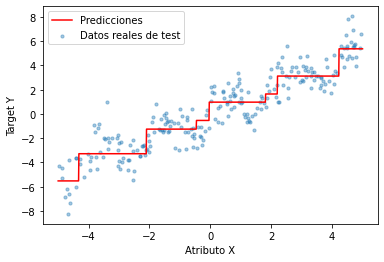

In [ ]:
plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

Se muestran los datos y el ajuste del modelo de árbol de decisión con el parámetro óptimo (max_depth=3). Como se muestra ajusta bastante bien a los datos de train y de test. Como no hay casi diferencia entre las métricas, el modelo no está sobreajustado. 

En el siguiente código se muestra el resultado de no realizar una validación correcta y símplemente entrenar el modelo con un parámetro max_depth muy alto, en este caso con el valor = 10


In [ ]:
# Utilizo un modelo sobreajustado, incrementando mucho la profundidad del árbol
regr_overfitted = DecisionTreeRegressor(max_depth=10)
regr_overfitted.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# Predigo en train y test
y_train_pred = regr_overfitted.predict(X_train)
y_test_pred = regr_overfitted.predict(X_test)
y_overfitted = regr_overfitted.predict(X_fit)

In [ ]:
# Obtengo las métricas en train y en test
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

La R^2 en los datos de train es: 0.96
La R^2 en los datos de test es: 0.82


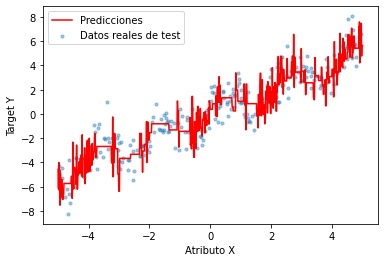

In [ ]:
# Represento las predicciones y los datos reales
plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_overfitted, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()